<a href="https://colab.research.google.com/github/TWmin13/IRIS/blob/main/Ocular_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
 99% 1.61G/1.62G [00:22<00:00, 109MB/s]
100% 1.62G/1.62G [00:22<00:00, 76.7MB/s]


In [3]:
import zipfile

dataset_path = "ocular-disease-recognition-odir5k.zip"
extract_path = "/content/ocular-disease-recognition-odir5k"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: /content/ocular-disease-recognition-odir5k


In [4]:
import os

for root, dirs, files in os.walk(extract_path):
    print(root)


/content/ocular-disease-recognition-odir5k
/content/ocular-disease-recognition-odir5k/ODIR-5K
/content/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K
/content/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Testing Images
/content/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images
/content/ocular-disease-recognition-odir5k/preprocessed_images


In [5]:
import os

dataset_path = "/content/ocular-disease-recognition-odir5k"  # Correct path

for dirname, _, filenames in os.walk(dataset_path):
    print(dirname)  # This should now show all subdirectories correctly


/content/ocular-disease-recognition-odir5k
/content/ocular-disease-recognition-odir5k/ODIR-5K
/content/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K
/content/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Testing Images
/content/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images
/content/ocular-disease-recognition-odir5k/preprocessed_images


In [6]:
import pandas as pd


csv_path = "/content/ocular-disease-recognition-odir5k/full_df.csv"  # Adjust the filename if needed

# Load the dataset
df = pd.read_csv(csv_path)

# Display the first few rows
df.head()


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [7]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [8]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [9]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [10]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [11]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [12]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [16]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [17]:
print(len(cataract),len(normal))

594 500


In [18]:
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/ocular-disease-recognition-odir5k/preprocessed_images/"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [19]:
dataset = create_dataset(cataract,1)
len(dataset)

100%|██████████| 594/594 [00:01<00:00, 520.58it/s]


588

In [20]:
dataset = create_dataset(normal,0)
len(dataset)

100%|██████████| 500/500 [00:01<00:00, 391.50it/s]


1088

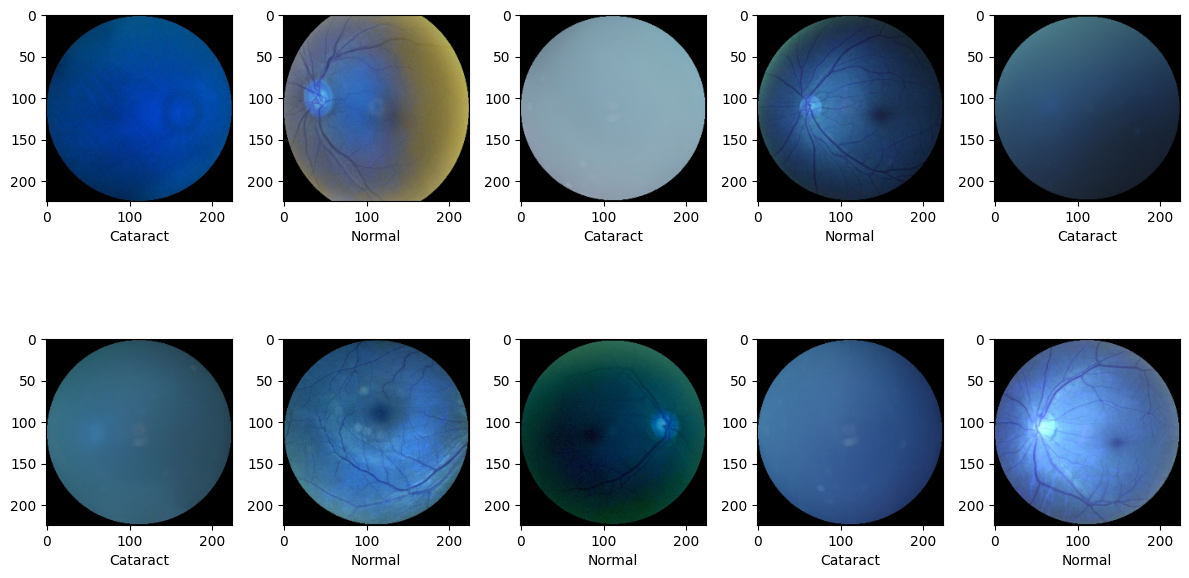

In [21]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [22]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**VGG19**

In [24]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))
for layer in vgg.layers:
    layer.trainable = False
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model1 = Sequential()
model1.add(vgg)
model1.add(Flatten())
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,049,473 (76.48 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [25]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("vgg19.h5", monitor="val_acc", verbose=1, save_best_only=True,
                             save_weights_only=False, save_freq='epoch')

# Stop training if validation accuracy doesn't improve for 5 consecutive epochs
earlystop = EarlyStopping(monitor="val_acc", patience=5, verbose=1)


In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint("vgg19.h5", monitor="val_accuracy", verbose=1, save_best_only=True,
                             save_weights_only=False, save_freq='epoch')

# Stop training if validation accuracy doesn't improve for 5 consecutive epochs
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1, mode='max')

# Train the model
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test),
                       verbose=1, callbacks=[checkpoint, earlystop])


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8802 - loss: 1.0132
Epoch 1: val_accuracy improved from -inf to 0.95872, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 673ms/step - accuracy: 0.8811 - loss: 1.0169 - val_accuracy: 0.9587 - val_loss: 0.3045
Epoch 2/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9671 - loss: 0.1774
Epoch 2: val_accuracy improved from 0.95872 to 0.96789, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.9670 - loss: 0.1797 - val_accuracy: 0.9679 - val_loss: 0.2711
Epoch 3/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.9862 - loss: 0.0540
Epoch 3: val_accuracy did not improve from 0.96789
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.9862 - loss: 0.0543 - val_accuracy: 0.9083 - val_loss: 0.5214
Epoch 4/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9643 - loss: 0.1612
Epoch 4: val_accuracy improved from 0.96789 to 0.97248, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.9651 - loss: 0.1613 - val_accuracy: 0.9725 - val_loss: 0.2058
Epoch 5/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9948 - loss: 0.0169
Epoch 5: val_accuracy did not improve from 0.97248
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9725 - val_loss: 0.1293
Epoch 6/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9946 - loss: 0.0203
Epoch 6: val_accuracy improved from 0.97248 to 0.98624, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.9946 - loss: 0.0203 - val_accuracy: 0.9862 - val_loss: 0.1266
Epoch 7/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9983 - loss: 0.0023
Epoch 7: val_accuracy improved from 0.98624 to 0.99083, saving model to vgg19.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.9984 - loss: 0.0023 - val_accuracy: 0.9908 - val_loss: 0.0872
Epoch 8/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 1.0000 - loss: 1.1991e-04
Epoch 8: val_accuracy did not improve from 0.99083
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 1.0000 - loss: 1.1599e-04 - val_accuracy: 0.9908 - val_loss: 0.1074
Epoch 9/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 1.0000 - loss: 1.1188e-04
Epoch 9: val_accuracy did not improve from 0.99083
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - accuracy: 1.0000 - loss: 1.0868e-04 - val_accuracy: 0.9908 - val_loss: 0.1004
Epoch 10/10
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 1.0000 - loss: 5.2546e-05
Epoch 10: val_accuracy did not improve from 0.99083
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 273ms/step - accuracy: 1.0000 - loss: 5.1348e-05 - val_accuracy: 0.9908 - val_loss: 0.0969


In [27]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9906 - loss: 0.0573
loss: 0.06702431291341782
Accuracy: 0.9908257126808167


In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step


0.9908256880733946

In [29]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        99
           1       0.98      1.00      0.99       119

    accuracy                           0.99       218
   macro avg       0.99      0.99      0.99       218
weighted avg       0.99      0.99      0.99       218



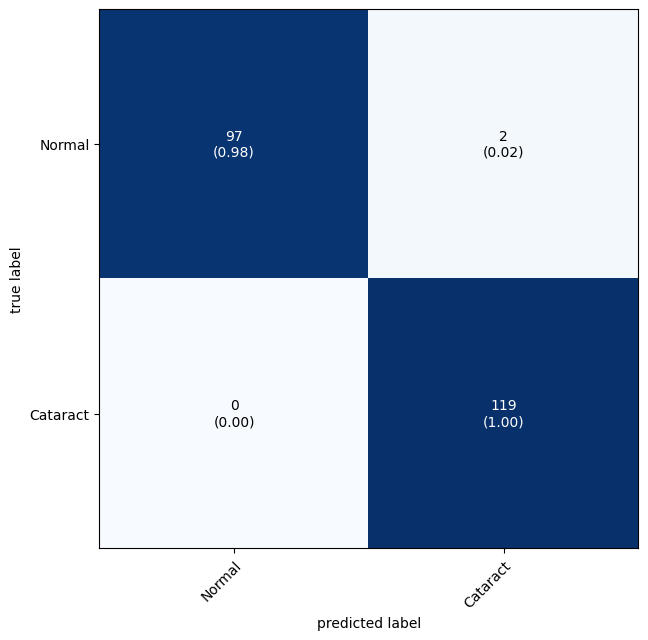

In [30]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

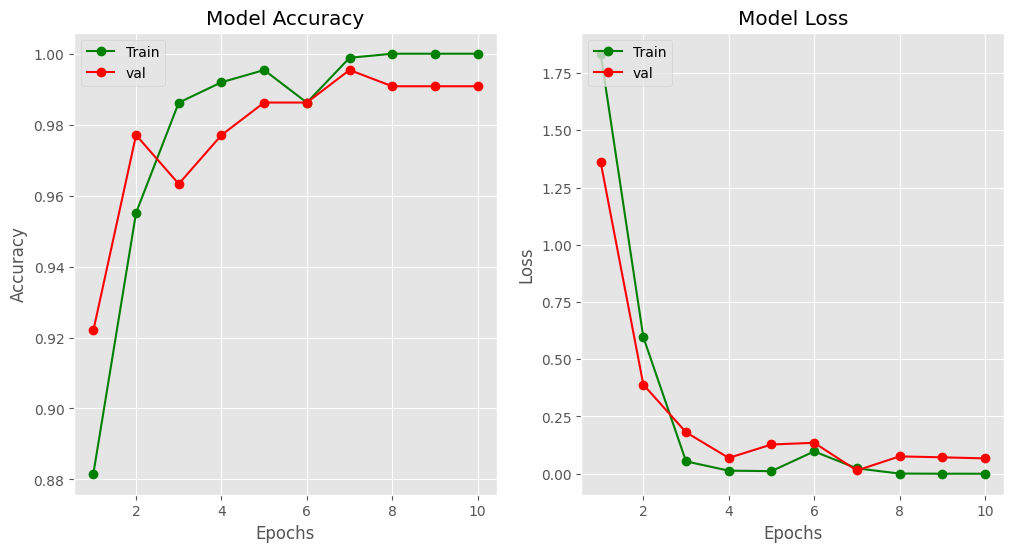

In [31]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history1.history["accuracy"],"go-")
plt.plot(epochs,history1.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history1.history["loss"],"go-")
plt.plot(epochs,history1.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

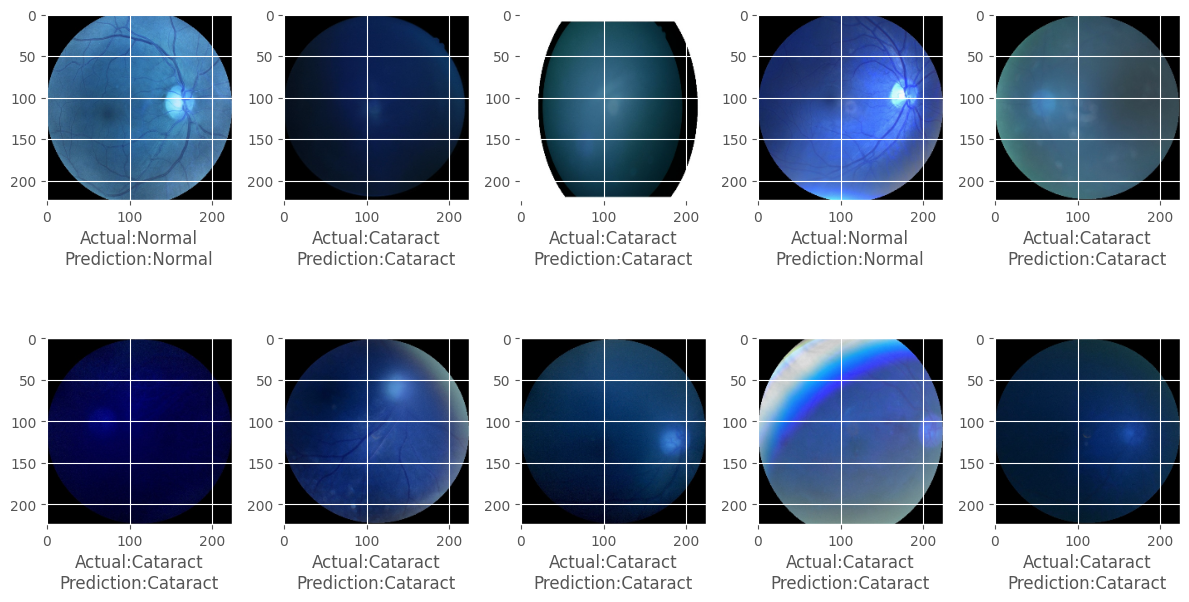

In [32]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred1[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

**ResNet50**

**Vision transformers**

In [34]:
!pip install tensorflow==2.15.0 tensorflow-addons



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfull

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset (Modify based on your dataset)
x = np.random.rand(100, 224, 224, 3)  # Example: 100 images of size 224x224x3
y = np.random.randint(0, 2, (100,))   # Example: 100 labels (binary classification)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print shapes
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (80, 224, 224, 3) - y_train shape: (80,)
x_test shape: (20, 224, 224, 3) - y_test shape: (20,)


In [5]:
num_classes = 2
input_shape = (224, 224, 3)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (80, 224, 224, 3) - y_train shape: (80,)
x_test shape: (20, 224, 224, 3) - y_test shape: (20,)


In [3]:
import os

dataset_path = "/content/ocular-disease-recognition-odir5k"

# List all files and folders
print("Dataset contents:", os.listdir(dataset_path))


Dataset contents: ['full_df.csv', 'ODIR-5K', 'preprocessed_images']


In [4]:
import pandas as pd

# Check if CSV exists
csv_path = os.path.join(dataset_path, "full_df.csv")  # Change filename if needed

# Load CSV
df = pd.read_csv(csv_path)
print(df.head())  # View first few rows


   ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild nonproliferative re

In [5]:
import pandas as pd

# Load the CSV file
csv_path = "/content/ocular-disease-recognition-odir5k/full_df.csv"  # Adjust filename if needed
df = pd.read_csv(csv_path)

# Print column names
print("Columns in CSV:", df.columns)


Columns in CSV: Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')


In [6]:
import os

# Set dataset path
dataset_path = "/content/ocular-disease-recognition-odir5k/preprocessed_images"  # Adjust if needed

# Use the correct column name
df["image_path"] = df["filename"].apply(lambda x: os.path.join(dataset_path, x))

# Print a few paths to check
print(df[["filename", "image_path"]].head())


      filename                                         image_path
0  0_right.jpg  /content/ocular-disease-recognition-odir5k/pre...
1  1_right.jpg  /content/ocular-disease-recognition-odir5k/pre...
2  2_right.jpg  /content/ocular-disease-recognition-odir5k/pre...
3  4_right.jpg  /content/ocular-disease-recognition-odir5k/pre...
4  5_right.jpg  /content/ocular-disease-recognition-odir5k/pre...


In [7]:
missing_files = [img for img in df["image_path"] if not os.path.exists(img)]
print(f"Missing images: {len(missing_files)}")

if missing_files:
    print("Example missing file:", missing_files[0])  # Check what’s missing


Missing images: 0


In [8]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Extract images and labels
x = df["image_path"].values  # Image paths
y = df["target"].values  # Labels (use correct column for labels)

# Load images into NumPy array
image_size = (224, 224)  # Resize if needed
x_data = np.array([cv2.resize(cv2.imread(img), image_size) for img in x])

# Convert labels to NumPy array
y_data = np.array(y)

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=218/1088, random_state=42)

# Print final dataset shapes
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (5111, 224, 224, 3) - y_train shape: (5111,)
x_test shape: (1281, 224, 224, 3) - y_test shape: (1281,)


In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define model hyperparameters
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
image_size = 224  # Updated to match input shape
patch_size = 16  # Patch size for Vision Transformer
num_patches = (image_size // patch_size) ** 2  # Total number of patches
projection_dim = 64  # Dimension for patch embeddings
num_heads = 4  # Multi-head attention heads
transformer_layers = 6  # Number of Transformer blocks
transformer_units = [projection_dim * 2, projection_dim]  # Transformer MLP units
mlp_head_units = [512, 256]  # MLP head units for classification
num_classes = 8  # Number of output classes

# Define data augmentation layers
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])





In [53]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [54]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [56]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 16 X 16
Patches per image: 196
Elements per patch: 768


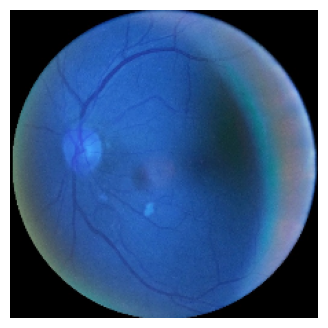

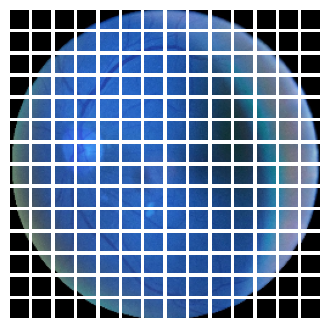

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [58]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [59]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.2)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model3 = keras.Model(inputs=inputs, outputs=logits)
    return model3

In [19]:
model3 = create_vit_classifier()
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 patches_1 (Patches)         (None, None, 768)            0         ['sequential[0][0]']          
                                                                                                  
 patch_encoder (PatchEncode  (None, 196, 64)              61760     ['patches_1[0][0]']           
 r)                                                                                           

In [20]:
num_epochs = 30

In [21]:
import numpy as np

print("x_train type:", type(x_train), "x_train shape:", x_train.shape)
print("y_train type:", type(y_train), "y_train shape:", y_train.shape)

# Convert to NumPy arrays if needed
if not isinstance(x_train, np.ndarray):
    x_train = np.array(x_train)
if not isinstance(y_train, np.ndarray):
    y_train = np.array(y_train)


x_train type: <class 'numpy.ndarray'> x_train shape: (5111, 224, 224, 3)
y_train type: <class 'numpy.ndarray'> y_train shape: (5111,)


In [22]:
print("Unique labels in y_train:", np.unique(y_train))


Unique labels in y_train: ['[0, 0, 0, 0, 0, 0, 0, 1]' '[0, 0, 0, 0, 0, 0, 1, 0]'
 '[0, 0, 0, 0, 0, 1, 0, 0]' '[0, 0, 0, 0, 1, 0, 0, 0]'
 '[0, 0, 0, 1, 0, 0, 0, 0]' '[0, 0, 1, 0, 0, 0, 0, 0]'
 '[0, 1, 0, 0, 0, 0, 0, 0]' '[1, 0, 0, 0, 0, 0, 0, 0]']


In [23]:
loss = keras.losses.CategoricalCrossentropy(from_logits=True)


In [24]:
from tensorflow.keras.optimizers import AdamW

optimizer = AdamW(learning_rate=learning_rate, weight_decay=weight_decay)


In [25]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: []


In [26]:
print(y_train[:10])  # Print first 10 labels
print("y_train dtype:", y_train.dtype)  # Check data type


['[0, 0, 0, 1, 0, 0, 0, 0]' '[0, 1, 0, 0, 0, 0, 0, 0]'
 '[0, 0, 0, 0, 1, 0, 0, 0]' '[1, 0, 0, 0, 0, 0, 0, 0]'
 '[0, 0, 0, 0, 0, 0, 0, 1]' '[0, 0, 0, 1, 0, 0, 0, 0]'
 '[0, 1, 0, 0, 0, 0, 0, 0]' '[0, 1, 0, 0, 0, 0, 0, 0]'
 '[0, 1, 0, 0, 0, 0, 0, 0]' '[1, 0, 0, 0, 0, 0, 0, 0]']
y_train dtype: object


In [27]:
import numpy as np

# Convert string labels to actual NumPy arrays
y_train = np.array([np.fromstring(label.strip('[]'), sep=',') for label in y_train])
y_test = np.array([np.fromstring(label.strip('[]'), sep=',') for label in y_test])

print("y_train shape after conversion:", y_train.shape)
print("Example y_train:", y_train[:5])  # Print first 5 labels


y_train shape after conversion: (5111, 8)
Example y_train: [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [28]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

print("y_train shape after conversion:", y_train.shape)  # Should be (5111,)
print("Example y_train:", y_train[:10])  # Should show integers like [3, 1, 4, 0]
print("y_train dtype:", y_train.dtype)  # Should be int


y_train shape after conversion: (5111,)
Example y_train: [3 1 4 0 7 3 1 1 1 0]
y_train dtype: int64


In [29]:
import numpy as np
print("Unique labels in y_train:", np.unique(y_train))
print("Number of classes:", len(np.unique(y_train)))


Unique labels in y_train: [0 1 2 3 4 5 6 7]
Number of classes: 8


In [30]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Get the base model without the current output layer
base_model = model3.layers[-2].output  # Get the second-last layer

# Define the new output layer
num_classes = 8  # Match the number of labels in y_train
output_layer = Dense(num_classes)(base_model)  # Add a new Dense layer

# Create a new model with updated output
model3 = keras.Model(inputs=model3.input, outputs=output_layer)


In [31]:
model3.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)


In [ ]:
history3 = model3.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_split=0.1,
    callbacks=[checkpoint_callback],
)


Epoch 1/30
144/144 [==============================] - 1274s 9s/step - loss: 2.7059 - accuracy: 0.3429 - val_loss: 1.7065 - val_accuracy: 0.3809
Epoch 2/30
144/144 [==============================] - 1288s 9s/step - loss: 1.6932 - accuracy: 0.4036 - val_loss: 1.6133 - val_accuracy: 0.4180
Epoch 3/30
 73/144 [==============>...............] - ETA: 9:45 - loss: 1.6222 - accuracy: 0.4302